In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load(r"C:\Users\joshu\Desktop\uni\thesis_UCL\predictions\navitoclax_predictions_main_paper.npz")
x = data['x']
Y = data['Y']
x_test = data['x_test']
mu_mogp = data['mu_mogp']
std_mogp = data['std_mogp']
mu_morcgp = data['mu_morcgp']
std_morcgp = data['std_morcgp']


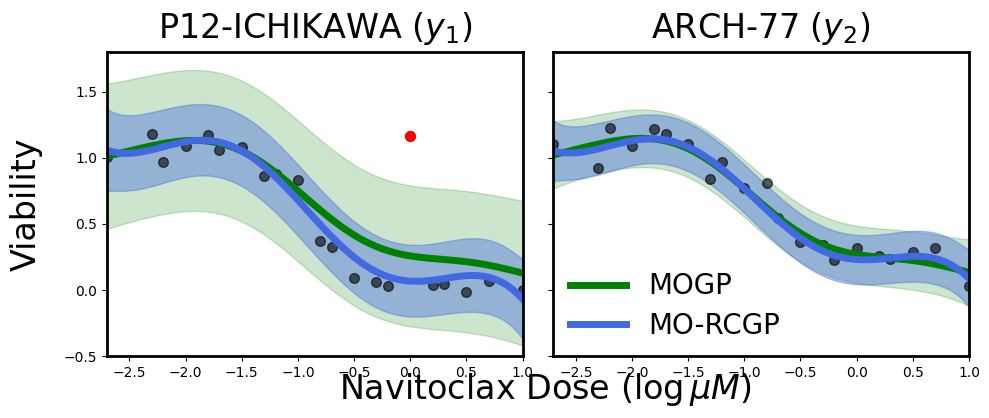

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    # Plotting data and predictions
    axs[i].plot(x.flatten(), Y[:, i], 'o', color='black', alpha=0.6, markersize=7)
    axs[i].plot(x_test.flatten(), mu_mogp[:, i], '-', color='green', label='MOGP', linewidth=5)
    axs[i].fill_between(x_test.flatten(),
                        mu_mogp[:, i] - 2*std_mogp[:, i],
                        mu_mogp[:, i] + 2*std_mogp[:, i],
                        color='green', alpha=0.2)
    
    axs[i].plot(x_test.flatten(), mu_morcgp[:, i], '-', color='royalblue', label='MO-RCGP', linewidth=5)
    axs[i].fill_between(x_test.flatten(),
                        mu_morcgp[:, i] - 2*std_morcgp[:, i],
                        mu_morcgp[:, i] + 2*std_morcgp[:, i],
                        color='royalblue', alpha=0.4)

    # Axes limits
    axs[i].set_ylim([-0.5, 1.8])
    axs[i].set_xlim([x[0], x[-1]])

    # Titles and labels
    if i == 0:
        axs[i].set_title(r"P12-ICHIKAWA ($y_1$)", fontsize=24, pad=10)
        axs[i].set_ylabel("Viability", fontsize=24, labelpad=15)
    elif i == 1:
        axs[i].set_title(r"ARCH-77 ($y_2$)", fontsize=24, pad=10)
        axs[i].set_yticklabels([])
        axs[i].legend(loc='lower left', fontsize=20, frameon=False, borderpad=0.1, labelspacing=0.4)

    # **Thick borders (spines)**
    for spine in axs[i].spines.values():
        spine.set_linewidth(2)  # change '3' to any thickness you want

# X-axis label
fig.text(0.55, -0.01, r'Navitoclax Dose $(\log\mu M)$', ha='center', fontsize=24)
axs[0].plot(x[15, 0], Y[15, 0], 'o', color='red', alpha=1, markersize=7)
plt.tight_layout()
plt.show()